In [2]:
import numpy as np
from nilearn import plotting, image
from nilearn import datasets
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure
from sklearn.covariance import GraphicalLassoCV

In [5]:
dict_atlas_msdl = datasets.fetch_atlas_msdl()  # load the msdl atlas image
dataset_deve_fmri = datasets.fetch_development_fmri(n_subjects=1)           # Load the functional datasets

D:\anaconda\envs\mne\lib\site-packages\numpy\lib\npyio.py:2407: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [6]:
atlas_msdl_path = dict_atlas_msdl['maps']                      # Loading atlas image stored in 'maps'
atlas_msdl_labels = dict_atlas_msdl['labels']                  # Loading atlas data stored in 'labels'

In [48]:
altas_msdl_masker = NiftiMapsMasker(maps_img=atlas_msdl_path, standardize=True)
msdl_time_series = altas_msdl_masker.fit_transform(dataset_deve_fmri.func[0], confounds=dataset_deve_fmri.confounds)

D:\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


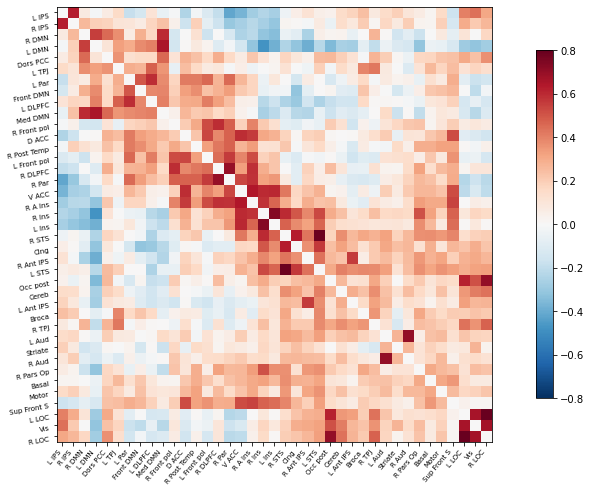

In [52]:
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([msdl_time_series])[0]
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=atlas_msdl_labels, vmax=0.8, vmin=-0.8, reorder=True)

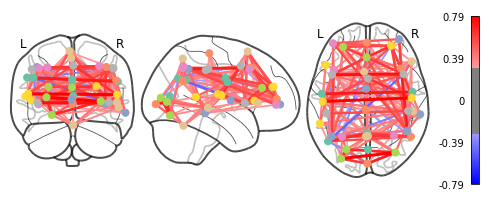

In [53]:
msdl_mni_coords = dict_atlas_msdl.region_coords
plotting.plot_connectome(correlation_matrix, msdl_mni_coords, edge_threshold="80%", colorbar=True)

In [54]:
plotting.view_connectome(correlation_matrix, msdl_mni_coords, edge_threshold='80%')

D:\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


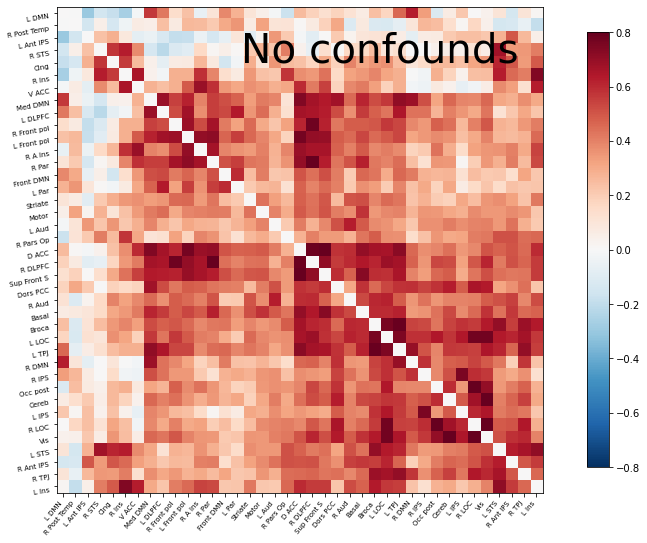

In [59]:
msdl_time_series_wc = altas_msdl_masker.fit_transform(dataset_deve_fmri.func[0])
correlation_matrix_wc = correlation_measure.fit_transform([msdl_time_series_wc])[0]
np.fill_diagonal(correlation_matrix_wc, 0)
plotting.plot_matrix(correlation_matrix_wc, figure=(10, 10), labels=atlas_msdl_labels, vmax=0.8, vmin=-0.8, title='No confounds', reorder=True)

# Computing a connectome with sparse inverse covariance

In [63]:
estimator = GraphicalLassoCV()
estimator.fit(msdl_time_series)
correlation_matrix_co = estimator.covariance_
np.fill_diagonal(correlation_matrix_co, 0)

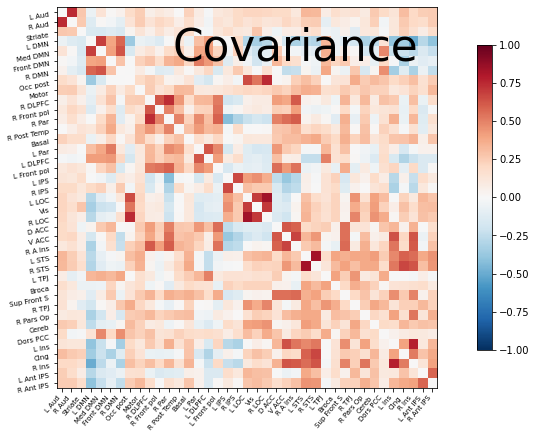

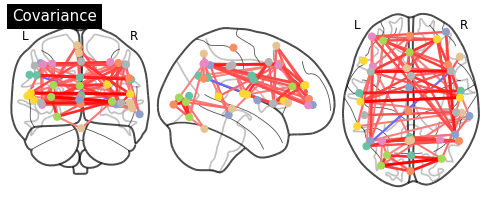

In [68]:
plotting.plot_matrix(correlation_matrix_co, labels=atlas_msdl_labels,
                    figure=(9, 7), vmax=1, vmin=-1,
                    title='Covariance')
msdl_coords = dict_atlas_msdl.region_coords
plotting.plot_connectome(correlation_matrix_co, msdl_coords, edge_threshold="90%", title='Covariance')

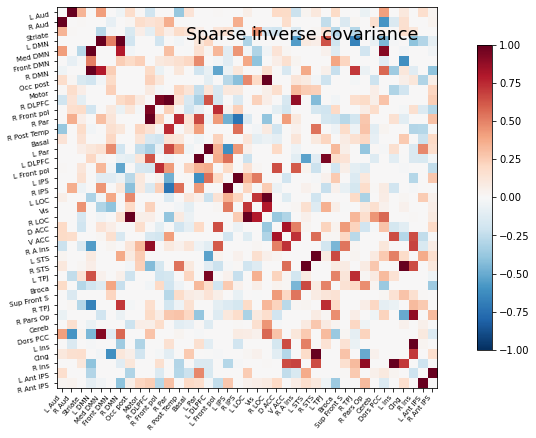

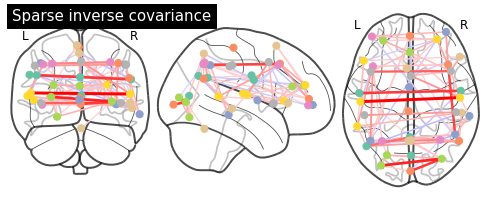

In [73]:
correlation_matrix_pre = -estimator.precision_
np.fill_diagonal(correlation_matrix_pre, 0)
plotting.plot_matrix(correlation_matrix_pre, labels= atlas_msdl_labels,
                     figure=(9, 7), vmax=1, vmin=-1,
                     title='Sparse inverse covariance')
plotting.plot_connectome(correlation_matrix_pre, msdl_coords,
                         title='Sparse inverse covariance', edge_threshold="90%")

In [74]:
plotting.view_connectome(correlation_matrix_pre, msdl_mni_coords, edge_threshold='90%')